In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import datasets
import seaborn

In [2]:
dataset=datasets.load_iris()
medidas=dataset['data']
medidas.shape


(150, 4)

In [3]:
tipo=dataset['target']
tipo.shape

(150,)

In [4]:
dataset['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Me pongo a investigar

## Lo primero, los tipos

In [6]:
tipo=pd.DataFrame(tipo, columns=['Id_Tipo'])
tipo

,Id_Tipo
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
tipo['Tipo']=tipo['Id_Tipo'].apply( lambda id: dataset['target_names'][id])
tipo

,Id_Tipo,Tipo
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [8]:
tipo['Tipo'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
frecuencias_tipos=tipo['Tipo'].value_counts().sort_values(ascending=False)

In [10]:
frecuencias_tipos

virginica     50
versicolor    50
setosa        50
Name: Tipo, dtype: int64

<BarContainer object of 3 artists>

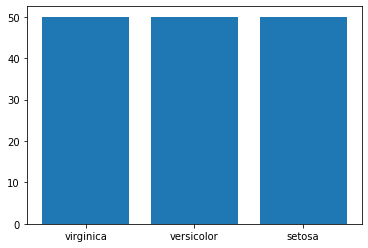

In [11]:
mpl.bar(frecuencias_tipos.index, frecuencias_tipos)

# Empezamos con las medidas

In [15]:
medidas=pd.DataFrame(medidas, columns=dataset['feature_names'])

In [16]:
medidas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# Esto siempre interesa...
medidas.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
    seaborn.distplot(medidas[tipo_medida] ,label=tipo_medida)


TypeError: distplot() got an unexpected keyword argument 'c'

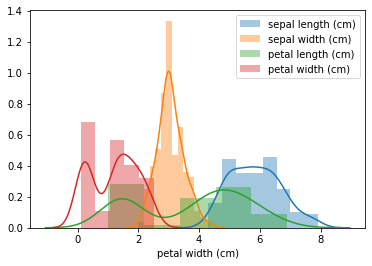

In [25]:
for tipo_medida in medidas.columns:
    seaborn.distplot(medidas[tipo_medida] ,label=tipo_medida)
mpl.legend(loc='upper right')

In [23]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

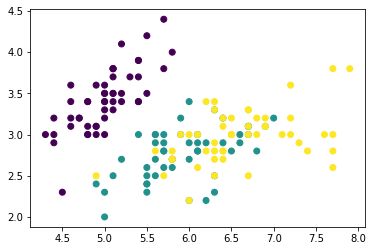

In [46]:
# Voy a analizar correlaciones entre las variables
mpl.scatter(medidas['sepal length (cm)'], medidas['sepal width (cm)'], c=tipo['Id_Tipo'])

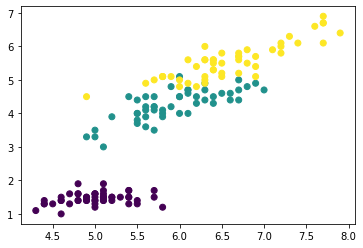

In [47]:
mpl.scatter(medidas['sepal length (cm)'], medidas['petal length (cm)'], c=tipo['Id_Tipo'])

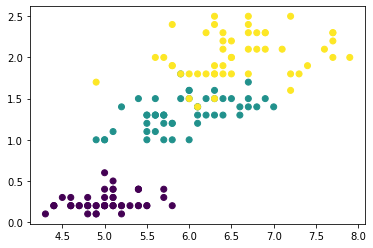

In [48]:
mpl.scatter(medidas['sepal length (cm)'], medidas['petal width (cm)'], c=tipo['Id_Tipo'])

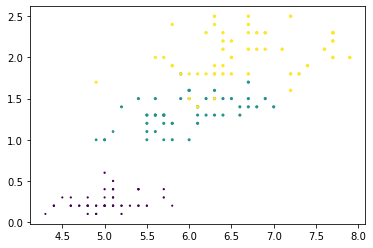

In [49]:
mpl.scatter(medidas['sepal length (cm)'], medidas['petal width (cm)'], medidas['petal length (cm)'], c=tipo['Id_Tipo'])

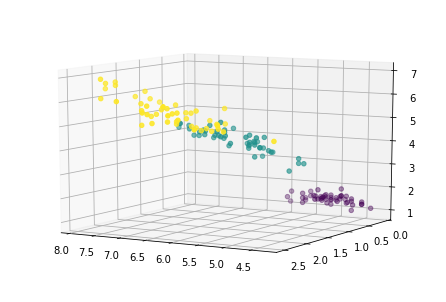

In [56]:
from mpl_toolkits.mplot3d import Axes3D
figura=mpl.figure()
ejes=Axes3D(figura, elev=10, azim=120)
ejes.scatter(medidas['sepal length (cm)'], medidas['petal width (cm)'], medidas['petal length (cm)'], c=tipo['Id_Tipo'])

In [58]:
# Analisis de componentes principales PCA
# Técnica de reducción de dimensiones

from sklearn.decomposition import PCA
nuevas_medidas=PCA().fit_transform(medidas)

In [59]:
nuevas_medidas

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

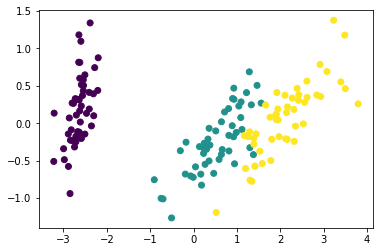

In [60]:
mpl.scatter(nuevas_medidas[:,0], nuevas_medidas[:,1], c=tipo['Id_Tipo'])

In [67]:
#medidas[medidas.columns[0]]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

# Modelo predictivo. Regresión Logistica


In [110]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression()
modelo.fit(nuevas_medidas[:,0:2],tipo['Id_Tipo'])
modelo.score(nuevas_medidas[:,0:2],tipo['Id_Tipo'])

0.9666666666666667

In [76]:
medicion_campo=np.array(   (    (5.1,3.5,1.4,0.2)    ,    (5.3,3.5,1.2,0.1), (5.9,3.0,5.1,1.8))    )
modelo.predict(medicion_campo)

array([0, 0, 2])

In [77]:
modelo.score(medidas,tipo['Id_Tipo'])

0.9733333333333334

In [78]:
from sklearn.metrics import confusion_matrix
tipos_reales=tipo['Id_Tipo']
tipos_modelo= modelo.predict(medidas)
confusion_matrix(  tipos_reales   ,  tipos_modelo  )

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

# Modelo basado en un perceptron

In [83]:
from sklearn.linear_model import Perceptron
modelo=Perceptron(alpha=0.000001)
modelo.fit(medidas,tipo['Id_Tipo'])

Perceptron(alpha=1e-06)

In [84]:
modelo.score(medidas,tipo['Id_Tipo'])

0.48

# Modelo basado en una red neuronal

In [90]:
from sklearn.neural_network import MLPClassifier
modelo=MLPClassifier(alpha=0.00001, hidden_layer_sizes=(10,5,3), random_state=2)
modelo.fit(medidas,tipo['Id_Tipo'])
modelo.score(medidas,tipo['Id_Tipo'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.3333333333333333

# http://github.com/ivanciniGT/cursoPythonCientifico